# Stores that Accept SNAP
In this data analysis, I will be taking a journey into looking at the stores that accept SNAP (supplemental nutrition assistance program) benefits. To specify, this data exploration will take a data set that contains data throughout the entire United States and filter it to only show results from stores in North Hollywood. Hopefully, this data exploration will visually depict who and where people in the US demonstrate need due to struggling with food insecurity. 

## import the data
I downloaded the data as a geojson, and uploaded it as a URL.

In [3]:
import geopandas as gpd

In [4]:
url = "https://opendata.arcgis.com/datasets/e9cc76a48ccb45628181ece7b2deb56d_0.geojson"
snap = gpd.read_file(url)

ensure the data has spatial function

In [5]:
type (snap)

geopandas.geodataframe.GeoDataFrame

## take a look at what the data looks like and how its structured
using the .head function, I am able to view a portion of the data and see how it is structured, related to columns and rows. 

In [6]:
snap.head()

,ObjectId,Store_Name,Address,Address_Line__2,City,State,Zip5,Zip4,County,Longitude,Latitude,geometry
0,1,DOLLARTREE 8500,978 SE Broad St,None,Metter,GA,30439,3933,CANDLER,-82.055046,32.396797,POINT (-82.05505 32.39680)
1,2,Meijer Gas Station 68,37201 Warren Rd,None,Westland,MI,48185,7219,WAYNE,-83.405739,42.332569,POINT (-83.40574 42.33257)
2,3,Meijer Gas Station 161,2145 Sir Barton Way,None,Lexington,KY,40509,2203,FAYETTE,-84.418816,38.020084,POINT (-84.41882 38.02008)
3,4,Mejier Gas Station 308,1820 Nagel Rd,None,Avon,OH,44011,1442,LORAIN,-81.988991,41.461140,POINT (-81.98899 41.46114)
4,5,Meijer Gas Station 214,13705 S Route 59,None,Plainfield,IL,60544,6106,WILL,-88.201988,41.632893,POINT (-88.20199 41.63289)


use the .info function to view the variables that the columns represent and see what data type it is.

In [7]:
snap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 244563 entries, 0 to 244562
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   ObjectId         244563 non-null  int64   
 1   Store_Name       244563 non-null  object  
 2   Address          244563 non-null  object  
 3   Address_Line__2  13770 non-null   object  
 4   City             244563 non-null  object  
 5   State            244563 non-null  object  
 6   Zip5             244563 non-null  object  
 7   Zip4             219981 non-null  object  
 8   County           244563 non-null  object  
 9   Longitude        244563 non-null  float64 
 10  Latitude         244563 non-null  float64 
 11  geometry         244563 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(8)
memory usage: 22.4+ MB


Check the size of the data set. There are over 240,000 rows/stores recorded in the data set, so it most likely needs filtering in order to have presentable data

In [8]:
snap.shape

(244563, 12)

## Cleaning up the Data
remove unnecessary columns that would not contribute to creating significant data or maps. 

In [9]:
desired_columns = ['Store_Name', 'Address','City','State','County','Longitude','Latitude','geometry']
snap[desired_columns]

,Store_Name,Address,City,State,County,Longitude,Latitude,geometry
0,DOLLARTREE 8500,978 SE Broad St,Metter,GA,CANDLER,-82.055046,32.396797,POINT (-82.05505 32.39680)
1,Meijer Gas Station 68,37201 Warren Rd,Westland,MI,WAYNE,-83.405739,42.332569,POINT (-83.40574 42.33257)
2,Meijer Gas Station 161,2145 Sir Barton Way,Lexington,KY,FAYETTE,-84.418816,38.020084,POINT (-84.41882 38.02008)
3,Mejier Gas Station 308,1820 Nagel Rd,Avon,OH,LORAIN,-81.988991,41.461140,POINT (-81.98899 41.46114)
4,Meijer Gas Station 214,13705 S Route 59,Plainfield,IL,WILL,-88.201988,41.632893,POINT (-88.20199 41.63289)
...,...,...,...,...,...,...,...,...
244558,Lucky Market 1,16401 N Cave Creek Rd,Phoenix,AZ,MARICOPA,-112.030410,33.635471,POINT (-112.03041 33.63547)
244559,Crossroad Community Convenience,2762 McCords Ferry Rd,Eastover,SC,RICHLAND,-80.688316,33.943432,POINT (-80.68832 33.94343)
244560,Stop-n-shop,147 W Chicago St,Coldwater,MI,BRANCH,-85.007118,41.941528,POINT (-85.00712 41.94153)
244561,Friendly Market,830 W Broadway Rd,Tempe,AZ,MARICOPA,-111.951710,33.407795,POINT (-111.95171 33.40780)


make a copy of the trimmed data

In [56]:
snap_trimmed = snap[desired_columns].copy()
snap_trimmed

,Store_Name,Address,City,State,County,Longitude,Latitude,geometry
0,DOLLARTREE 8500,978 SE Broad St,Metter,GA,CANDLER,-82.055046,32.396797,POINT (-82.05505 32.39680)
1,Meijer Gas Station 68,37201 Warren Rd,Westland,MI,WAYNE,-83.405739,42.332569,POINT (-83.40574 42.33257)
2,Meijer Gas Station 161,2145 Sir Barton Way,Lexington,KY,FAYETTE,-84.418816,38.020084,POINT (-84.41882 38.02008)
3,Mejier Gas Station 308,1820 Nagel Rd,Avon,OH,LORAIN,-81.988991,41.461140,POINT (-81.98899 41.46114)
4,Meijer Gas Station 214,13705 S Route 59,Plainfield,IL,WILL,-88.201988,41.632893,POINT (-88.20199 41.63289)
...,...,...,...,...,...,...,...,...
244558,Lucky Market 1,16401 N Cave Creek Rd,Phoenix,AZ,MARICOPA,-112.030410,33.635471,POINT (-112.03041 33.63547)
244559,Crossroad Community Convenience,2762 McCords Ferry Rd,Eastover,SC,RICHLAND,-80.688316,33.943432,POINT (-80.68832 33.94343)
244560,Stop-n-shop,147 W Chicago St,Coldwater,MI,BRANCH,-85.007118,41.941528,POINT (-85.00712 41.94153)
244561,Friendly Market,830 W Broadway Rd,Tempe,AZ,MARICOPA,-111.951710,33.407795,POINT (-111.95171 33.40780)


filter the data by stores located in Los Angeles County

In [24]:
snap_LA_County = snap_trimmed.query("County == 'LOS ANGELES'")
snap_LA_County

,Store_Name,Address,City,State,County,Longitude,Latitude,geometry
11,El Progreso 4,8257 Sepulveda Blvd,Panorama City,CA,LOS ANGELES,-118.46839,34.221004,POINT (-118.46839 34.22100)
75,New India Sweet & Spices,303 S Diamond Bar Blvd,Diamond Bar,CA,LOS ANGELES,-117.80947,34.020035,POINT (-117.80947 34.02004)
100,Downey Mart,13000 Paramount Blvd,Downey,CA,LOS ANGELES,-118.15609,33.918514,POINT (-118.15609 33.91851)
157,One Stop Mini Mart,12906 Branford St,Pacoima,CA,LOS ANGELES,-118.41369,34.240505,POINT (-118.41369 34.24050)
166,Malty Chevron,11529 Carson St,Lakewood,CA,LOS ANGELES,-118.08771,33.831539,POINT (-118.08771 33.83154)
...,...,...,...,...,...,...,...,...
244309,Westside NR Liquor Store,12012 W Washington Blvd,Los Angeles,CA,LOS ANGELES,-118.42248,33.997406,POINT (-118.42248 33.99741)
244334,Neo's Meats,604 S Long Beach Blvd,Compton,CA,LOS ANGELES,-118.20751,33.891148,POINT (-118.20751 33.89115)
244351,7 Eleven Store 38556 A,201 E Beverly Blvd.,Montebello,CA,LOS ANGELES,-118.09750,34.015015,POINT (-118.09750 34.01501)
244431,Jubilee Liquor,4212 W 3rd St,Los Angeles,CA,LOS ANGELES,-118.30574,34.068768,POINT (-118.30574 34.06877)


conduct a value count to look at the amount of stores per city. Los Angeles has too large of a data set, so I selected North Hollywood to continue the data analysis

In [44]:
snap_LA_County['City'].value_counts()

Los Angeles         1829
Long Beach           338
Inglewood            120
Pomona               115
North Hollywood      111
                    ... 
Lake Los Angeles       1
Pearblossom            1
WEST HOLLYWOOD         1
Tehachapi              1
Lincoln Heights        1
Name: City, Length: 162, dtype: int64

filter the trimmed data set to only include stores in North Hollywood

In [57]:
snap_city = snap_trimmed.query("City == 'North Hollywood'")
snap_city

,Store_Name,Address,City,State,County,Longitude,Latitude,geometry
1452,Jet Stream Liquor,10922 Vanowen St,North Hollywood,CA,LOS ANGELES,-118.36894,34.193935,POINT (-118.36894 34.19394)
2382,A & S Liquor,5745 Tujunga Ave,North Hollywood,CA,LOS ANGELES,-118.37907,34.175251,POINT (-118.37907 34.17525)
11757,El Mercadito Chalateco,6801 Lankershim Blvd,North Hollywood,CA,LOS ANGELES,-118.38783,34.194180,POINT (-118.38783 34.19418)
11974,Palms Marketplace Inc.,6631 Laurel Canyon Blvd,North Hollywood,CA,LOS ANGELES,-118.39655,34.191135,POINT (-118.39655 34.19114)
20644,CVS Pharmacy 1573,4744 Lankershim Blvd,North Hollywood,CA,LOS ANGELES,-118.36967,34.156799,POINT (-118.36967 34.15680)
...,...,...,...,...,...,...,...,...
232044,Agnes Mini Market,6755 Agnes Ave,North Hollywood,CA,LOS ANGELES,-118.39544,34.193123,POINT (-118.39544 34.19312)
233573,N & K Inc,11680 Victory Blvd,North Hollywood,CA,LOS ANGELES,-118.38715,34.186653,POINT (-118.38715 34.18665)
234603,Carniceria Don Juan 2,12922 Vanowen St,North Hollywood,CA,LOS ANGELES,-118.41468,34.193913,POINT (-118.41468 34.19391)
234652,Costco 653,11428 Sherman Way,North Hollywood,CA,LOS ANGELES,-118.38020,34.201160,POINT (-118.38020 34.20116)


## Plot the Data

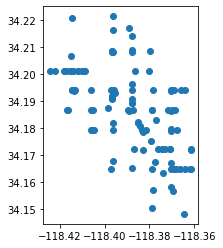

In [46]:
snap_LA.plot()

create a more visually appealing graph that depicts the data explicitly. 

In [47]:
import folium

In [53]:
latitude = snap_LA.Latitude.mean()
longitude = snap_LA.Longitude.mean()
m = folium.Map(location=[latitude,longitude],zoom_start=13)
for index, row in snap_LA.iterrows():
    folium.Marker(
    [row.Latitude, row.Longitude], popup=row.Store_Name, tooltip=row.Store_Name
    ).add_to(m)

m

as seen from the map projected above, stores that accept SNAP (supplemental nutrient assistant program) benefits are spread evenly through the city. This demonstrates a great need for SNAP among the citizens of North Hollywood. The store are also more heavily populated on main streets, where it is more accessible to a larger population of people. 